# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [2]:
import numpy as np
#from scipy.misc import imread, imresize
#import imageio
from skimage import io
from skimage.transform import resize
from skimage.util import crop
import matplotlib.pyplot as plt

import datetime
import os

In [3]:
from keras.layers import Dense, Activation, Dropout, Conv2D, LSTM, MaxPooling2D, Flatten, BatchNormalization, Conv3D, MaxPooling3D, Input

In [4]:
import pandas as pd

In [5]:
import imageio.v2 as imageio

We set the random seed so that the results don't vary drastically.

In [6]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
#tf.set_random_seed(30) --> Deprecated
tf.random.set_seed(30)

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [8]:
dataset_path = '/home/datasets/Project_data/'  # Jarvis lab
model_checkpoint_path = './modelCheckpoint/'


In [9]:
train_csv = dataset_path+'/train.csv'
val_csv = dataset_path+'/val.csv'

In [ ]:
train_df = pd.read_csv(train_csv, header=None)
val_df = pd.read_csv(val_csv, header=None)

# Ablation data set not be executed on final run

In [ ]:
#train_15_df = train_df[train_df[0].str.contains('WIN_20180907_15')]

In [ ]:
#val_15_df = val_df[val_df[0].str.contains('WIN_20180907_15')]

In [ ]:
#train_15_df.shape

In [ ]:
#val_15_df.shape

In [ ]:
#list(train_15_df[0])

In [ ]:
#train_csv = train_15_csv
#val_csv = val_15_csv

# Execute from here for the final run

In [10]:
curr_dt_time = datetime.datetime.now()
train_path = dataset_path+"/train/"
val_path = dataset_path+"/val/"
print('# train_path =', train_path)
print('# val_path =', val_path)


# train_path = /home/datasets/Project_data//train/
# val_path = /home/datasets/Project_data//val/


In [11]:
train_doc = np.random.permutation(open(train_csv).readlines())
val_doc = np.random.permutation(open(val_csv).readlines())
batch_size = 32 #experiment with the batch size

Execute below to start on ablation data set

In [ ]:
#train_doc = np.random.permutation(list(train_15_df[0]))
#val_doc = np.random.permutation(list(val_15_df[0]))
#batch_size = 5 #experiment with the batch size

In [12]:
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)


# training sequences = 663
# validation sequences = 100


In [13]:
import math
import cv2

In [ ]:
train_doc[0].split(",")[0].split(';')[0]

In [13]:
imgs = os.listdir(train_path+'/'+ train_doc[0].split(",")[0].split(';')[0])
img_file = train_path+'/'+ train_doc[0].split(",")[0].split(';')[0]+'/'+imgs[1]
#print(train_path, "\n", train_doc[0], "\n", img_file)
for idx,img in enumerate(imgs):
  print(idx, img)

0 WIN_20180926_16_54_08_Pro_00032.png
1 WIN_20180926_16_54_08_Pro_00050.png
2 WIN_20180926_16_54_08_Pro_00024.png
3 WIN_20180926_16_54_08_Pro_00020.png
4 WIN_20180926_16_54_08_Pro_00058.png
5 WIN_20180926_16_54_08_Pro_00044.png
6 WIN_20180926_16_54_08_Pro_00030.png
7 WIN_20180926_16_54_08_Pro_00016.png
8 WIN_20180926_16_54_08_Pro_00048.png
9 WIN_20180926_16_54_08_Pro_00040.png
10 WIN_20180926_16_54_08_Pro_00054.png
11 WIN_20180926_16_54_08_Pro_00056.png
12 WIN_20180926_16_54_08_Pro_00036.png
13 WIN_20180926_16_54_08_Pro_00026.png
14 WIN_20180926_16_54_08_Pro_00022.png
15 WIN_20180926_16_54_08_Pro_00062.png
16 WIN_20180926_16_54_08_Pro_00006.png
17 WIN_20180926_16_54_08_Pro_00028.png
18 WIN_20180926_16_54_08_Pro_00008.png
19 WIN_20180926_16_54_08_Pro_00038.png
20 WIN_20180926_16_54_08_Pro_00014.png
21 WIN_20180926_16_54_08_Pro_00060.png
22 WIN_20180926_16_54_08_Pro_00046.png
23 WIN_20180926_16_54_08_Pro_00064.png
24 WIN_20180926_16_54_08_Pro_00042.png
25 WIN_20180926_16_54_08_Pro_00018.

# Test image preprocessing 

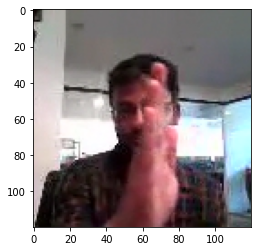

In [14]:
image = io.imread(img_file)
plt.imshow(image)
image = resize(image, (120, 160))
image = image[:,20:140]
plt.imshow(image)
#cropped_image = image[y1:y2, x1:x2]
#plt.imshow(cropped_image)
#cropped = image[x1:x2,y1:y2]

<Figure size 432x288 with 0 Axes>

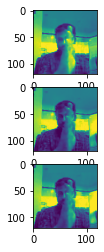

In [15]:
#from google.colab.patches import cv2_imshow
#image = resize(image, (128, 120))
#plt.imshow(image)
plt.figure()
f, axarr = plt.subplots(3,1) 

axarr[0].imshow(cv2.normalize(image[:,:,0], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX))
axarr[1].imshow(cv2.normalize(image[:,:,1], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX))
axarr[2].imshow(cv2.normalize(image[:,:,2], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX))



/home/datasets/Project_data//train/ 
 WIN_20180907_16_39_19_Pro_Left Swipe_new_Left Swipe_new;Left Swipe_new_Left Swipe_new;0
 
 /home/datasets/Project_data//train//WIN_20180907_16_39_19_Pro_Left Swipe_new_Left Swipe_new/WIN_20180907_16_39_19_Pro_00014.png


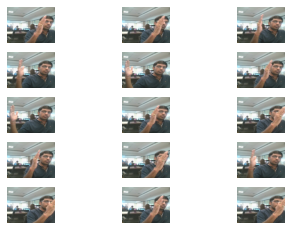

In [16]:
train_doc_inst = 12
step=2
imgs = os.listdir(train_path+'/'+ train_doc[train_doc_inst].split(",")[0].split(';')[0])
img_file = train_path+'/'+ train_doc[train_doc_inst].split(",")[0].split(';')[0]+'/'+imgs[25]
print(train_path, "\n", train_doc[train_doc_inst], "\n", img_file)
rows = 5
for x in range(math.floor(30/step)):
  index = x*step
  img_file = train_path+'/'+ train_doc[train_doc_inst].split(",")[0].split(';')[0]+'/'+imgs[index]
  image = io.imread(img_file)
  image = resize(image, (120, 160))
  normalized_image = cv2.normalize(image[:,:,0], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

  plt.subplot(rows,6,index+1)
  #plt.title(x.split('.')[0])
  plt.axis('off')
  plt.imshow(image)

#plt.imshow(image)

#image = resize(image, (120, 128))
#plt.imshow(image)
#plt.show()


## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [14]:
#Generator Configuration
img_height = 120
img_width = 120
no_of_frames=30 #Number of Frames
y=img_height
z=img_width
no_classes = 5 #Number of Guestures to recognize

In [15]:
def generator(source_path, folder_list, batch_size, no_of_frames=30):
    #print( 'Source path = ', source_path, '; batch size =', batch_size)
    #img_idx = [x for x in range(30)] #[(x+1)*2 for x in range(14)] #create a list of image numbers you want to use for a particular video
    img_idx = np.round(np.linspace(0, 29, no_of_frames)).astype(int)
    while True:
        t = np.random.permutation(folder_list)
        num_batches = math.floor(len(folder_list)/batch_size) # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,no_of_frames,y,z,3)) # no_of_frames is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imageio.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)

                    image = resize(image, (120, 160)) #Only resizing to smaller size. No cropping applied as the image as slide left and right is covering the x-axis and thumbs-up, thumbs-down is covering y-axis
                    image = image[:,20:140] # cropped to consider only the center portion (120x120)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape
                    #and the conv3D will throw error if the inputs in a batch have different shapes

                    #normalise and feed in the image
                    batch_data[folder,idx,:,:,0] = cv2.normalize(image[:,:,0], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
                    batch_data[folder,idx,:,:,1] = cv2.normalize(image[:,:,1], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
                    batch_data[folder,idx,:,:,2] = cv2.normalize(image[:,:,2], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do


        # write the code for the remaining data points which are left after full batches
        last_batch_size = int(len(folder_list)%batch_size) # calculate the number of batches
        start_index = int(len(folder_list)/batch_size)
        batch_data = np.zeros((batch_size,no_of_frames,y,z,3)) # no_of_frames is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
        batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
        for folder in range(last_batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[start_index + folder].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imageio.imread(source_path+'/'+ t[start_index + folder].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)

                    image = resize(image, (120, 160)) #Only resizing to smaller size. No cropping applied as the image as slide left and right is covering the x-axis and thumbs-up, thumbs-down is covering y-axis
                    image = image[:,20:140] # cropped to consider only the center portion (120x120)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape
                    #and the conv3D will throw error if the inputs in a batch have different shapes

                    #normalise and feed in the image
                    batch_data[folder,idx,:,:,0] = cv2.normalize(image[:,:,0], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
                    batch_data[folder,idx,:,:,1] = cv2.normalize(image[:,:,1], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
                    batch_data[folder,idx,:,:,2] = cv2.normalize(image[:,:,2], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

                batch_labels[folder, int(t[start_index + folder].strip().split(';')[2])] = 1
        yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

# Test generator function

In [ ]:
#print(train_path, train_doc, batch_size)
#print(val_path, val_doc, batch_size)
itr=0
for batch_data, batch_labels in generator(train_path, train_doc, batch_size):
#for batch_data, batch_labels in generator(val_path, val_doc, batch_size):
    #print(batch_labels)
    itr=itr+1
    if itr == 4:
        print("Iteration Successful")
        break;
    


Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [16]:
num_epochs = 20 # choose the number of epochs
batch_size = 32
print ('# epochs =', num_epochs)
print ('# no_classes =', no_classes)
print ('# image_size = %d,%d'%(img_height, img_width))
print ('# no_of_frames =', no_of_frames)


# epochs = 20
# no_classes = 5
# image_size = 120,120
# no_of_frames = 30


## Modelling
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [17]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Reshape
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers



In [18]:
def plotModelHistory(h, model_name_ts):
    fig, ax = plt.subplots(1, 2, figsize=(15,4))
    ax[0].plot(h.history['loss'])   
    ax[0].plot(h.history['val_loss'])
    ax[0].legend(['loss','val_loss'])
    ax[0].title.set_text(model_name_ts + ": Train loss vs Validation loss")

    ax[1].plot(h.history['categorical_accuracy'])   
    ax[1].plot(h.history['val_categorical_accuracy'])
    ax[1].legend(['categorical_accuracy','val_categorical_accuracy'])
    ax[1].title.set_text(model_name_ts + ": Train accuracy vs Validation accuracy")
    plt.show()

    print("Max. Training Accuracy", max(h.history['categorical_accuracy']))
    print("Max. Validaiton Accuracy", max(h.history['val_categorical_accuracy']))

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

In [19]:
train_generator = generator(train_path, train_doc, batch_size, no_of_frames)
val_generator = generator(val_path, val_doc, batch_size, no_of_frames)

In [20]:
def get_model_name(model_name):
    model_name_ts = model_name + 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    if not os.path.exists(model_name):
        os.mkdir(model_name)
    
    return model_name_ts


In [ ]:
callbacks_list = []
def init_model_checkpoint(model_name):
    model_name_ts = get_model_name(model_name)
    filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'
    #filepath = model_name_ts + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.keras'
    checkpoint = ModelCheckpoint(model_checkpoint_path+filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
    LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001) # write the REducelronplateau code here
    callbacks_list = [checkpoint, LR]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [21]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [22]:
print("num_train_sequences = %d, num_val_sequences = %d, batch_size = %d"%(num_train_sequences,num_val_sequences, batch_size))
print("# steps_per_epoch =", steps_per_epoch)
print("# validation_steps =", validation_steps)
print("# num_epochs =", num_epochs)

num_train_sequences = 663, num_val_sequences = 100, batch_size = 32
# steps_per_epoch = 21
# validation_steps = 4
# num_epochs = 20


Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

# **Conv3D without Drop-outs**


In [27]:
# Model1: CNN conv3D hyper-parameter configuration
batch_size=32
num_epochs = 20
no_of_frames=30 # Number of frames
y=img_height
z=img_width

print ('# batch_size =', batch_size)
print ('# epochs =', num_epochs)
print ('# no_classes =', no_classes)
print ('# input_shape = (%d,%d,%d,%d)'%(no_of_frames, img_height, img_width,3))
#print(batch_size, x, y, z, 3)

# batch_size = 32
# epochs = 20
# no_classes = 5
# input_shape = (30,120,120,3)


In [28]:
#Write model using Conv3D and MaxPooling3D
conv3d_model = Sequential()
conv3d_model.add(Input((no_of_frames, y, z, 3)))
#conv3d_model.add(Conv3D(16, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(batch_size, img_height,img_width,3)))
conv3d_model.add(Conv3D(16, kernel_size=(3, 3, 3), activation='relu'))
conv3d_model.add(MaxPooling3D(pool_size=(2, 2, 2)))
conv3d_model.add(BatchNormalization())
conv3d_model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu'))
conv3d_model.add(MaxPooling3D(pool_size=(2, 2, 2)))
conv3d_model.add(BatchNormalization())
conv3d_model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
conv3d_model.add(MaxPooling3D(pool_size=(2, 2, 2)))
conv3d_model.add(BatchNormalization())
conv3d_model.add(Flatten())
conv3d_model.add(Dense(128, activation='relu'))
conv3d_model.add(BatchNormalization())
conv3d_model.add(Dense(64, activation='relu'))
conv3d_model.add(BatchNormalization())
conv3d_model.add(Dense(no_classes, activation='softmax'))

2024-07-31 10:28:26.967316: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-07-31 10:28:26.967397: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14800 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:3d:00.0, compute capability: 7.5


Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [29]:
learning_rate = 0.1
optimiser = tf.keras.optimizers.Adam(learning_rate=learning_rate) #write your optimizer
conv3d_model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (conv3d_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 28, 118, 118, 16)  1312      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 14, 59, 59, 16)   0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 59, 59, 16)   64        
 ormalization)                                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 12, 57, 57, 32)    13856     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 6, 28, 28, 32)    0         
 3D)                                                             
                                                        

In [31]:
model_name_ts = get_model_name('cnn_conv3d_without_dropouts')
filepath = model_name_ts + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'
#filepath = model_name_ts + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.keras'
checkpoint = ModelCheckpoint(model_checkpoint_path+filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

In [32]:
#conv3d_model.fit(train_generator, epochs=2, validation_data=val_generator, callbacks=callbacks_list)
cnn_model_history = conv3d_model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                    callbacks=callbacks_list, validation_data=val_generator,
                    validation_steps=validation_steps)#, initial_epoch=0)

Epoch 1/20


2024-07-31 10:29:17.820929: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


21/21 [==============================] - ETA: 0s - loss: 1.9227 - categorical_accuracy: 0.3393
Epoch 00001: saving model to ./modelCheckpoint/cnn_conv3d_without_dropoutsmodel_init_2024-07-3110_24_02.439563/model-00001-1.92268-0.33929-9327.68359-0.17969.h5
21/21 [==============================] - 155s 7s/step - loss: 1.9227 - categorical_accuracy: 0.3393 - val_loss: 9327.6836 - val_categorical_accuracy: 0.1797 - lr: 0.1000
Epoch 2/20
21/21 [==============================] - ETA: 0s - loss: 1.3981 - categorical_accuracy: 0.4330
Epoch 00002: saving model to ./modelCheckpoint/cnn_conv3d_without_dropoutsmodel_init_2024-07-3110_24_02.439563/model-00002-1.39810-0.43304-255.25769-0.16406.h5
21/21 [==============================] - 148s 7s/step - loss: 1.3981 - categorical_accuracy: 0.4330 - val_loss: 255.2577 - val_categorical_accuracy: 0.1641 - lr: 0.1000
Epoch 3/20
21/21 [==============================] - ETA: 0s - loss: 1.2374 - categorical_accuracy: 0.4598
Epoch 00003: saving model to ./mo

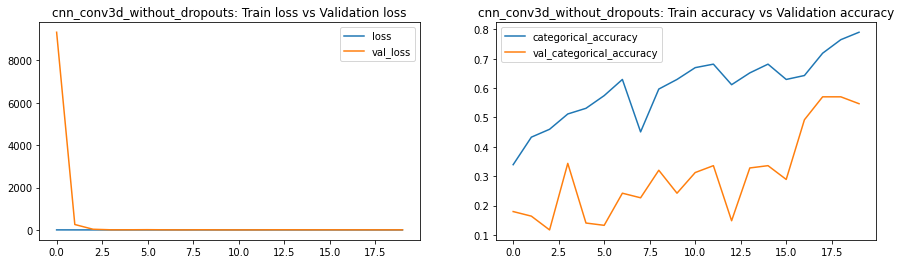

Max. Training Accuracy 0.7901785969734192
Max. Validaiton Accuracy 0.5703125


In [33]:
#Plot CNN Model History with Conv3D
plotModelHistory(cnn_model_history, 'cnn_conv3d_without_dropouts')

# Conv3D with dropouts

In [34]:
# Model1: CNN conv3D hyper-parameter configuration without dropouts
batch_size=32
num_epochs = 20
no_of_frames=30 # Number of frames
y=img_height
z=img_width

print ('# batch_size =', batch_size)
print ('# epochs =', num_epochs)
print ('# no_classes =', no_classes)
print ('# input_shape = (%d,%d,%d,%d)'%(no_of_frames, img_height, img_width,3))
#print(batch_size, x, y, z, 3)

# batch_size = 32
# epochs = 20
# no_classes = 5
# input_shape = (30,120,120,3)


In [35]:
#Write model using Conv3D and MaxPooling3D
conv3d_with_dropout_model = Sequential()
conv3d_with_dropout_model.add(Input((no_of_frames, y, z, 3)))
#conv3d_model.add(Conv3D(16, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(batch_size, img_height,img_width,3)))
conv3d_with_dropout_model.add(Conv3D(16, kernel_size=(3, 3, 3), activation='relu'))
conv3d_with_dropout_model.add(MaxPooling3D(pool_size=(2, 2, 2)))
conv3d_with_dropout_model.add(BatchNormalization())
conv3d_with_dropout_model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu'))
conv3d_with_dropout_model.add(MaxPooling3D(pool_size=(2, 2, 2)))
conv3d_with_dropout_model.add(BatchNormalization())
conv3d_with_dropout_model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
conv3d_with_dropout_model.add(MaxPooling3D(pool_size=(2, 2, 2)))
conv3d_with_dropout_model.add(BatchNormalization())
conv3d_with_dropout_model.add(Flatten())
conv3d_with_dropout_model.add(Dense(128, activation='relu'))
conv3d_with_dropout_model.add(BatchNormalization())
conv3d_with_dropout_model.add(Dropout(0.25))
conv3d_with_dropout_model.add(Dense(64, activation='relu'))
conv3d_with_dropout_model.add(BatchNormalization())
conv3d_with_dropout_model.add(Dropout(0.25))
conv3d_with_dropout_model.add(Dense(no_classes, activation='softmax'))

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [36]:
learning_rate = 0.1
optimiser = tf.keras.optimizers.Adam(learning_rate=learning_rate) #write your optimizer
conv3d_with_dropout_model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (conv3d_with_dropout_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 28, 118, 118, 16)  1312      
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 14, 59, 59, 16)   0         
 3D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 14, 59, 59, 16)   64        
 hNormalization)                                                 
                                                                 
 conv3d_4 (Conv3D)           (None, 12, 57, 57, 32)    13856     
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 6, 28, 28, 32)    0         
 3D)                                                             
                                                      

In [37]:
model_name_ts = get_model_name('cnn_conv3d_with_dropouts')
filepath = model_name_ts + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'
#filepath = model_name_ts + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.keras'
checkpoint = ModelCheckpoint(model_checkpoint_path+filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

In [38]:
cnn_model_with_dropout_history = conv3d_with_dropout_model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                    callbacks=callbacks_list, validation_data=val_generator,
                    validation_steps=validation_steps)#, initial_epoch=0)

Epoch 1/20
21/21 [==============================] - ETA: 0s - loss: 1.9204 - categorical_accuracy: 0.3378
Epoch 00001: saving model to ./modelCheckpoint/cnn_conv3d_with_dropoutsmodel_init_2024-07-3110_24_02.439563/model-00001-1.92045-0.33780-9115.18262-0.17969.h5
21/21 [==============================] - 150s 7s/step - loss: 1.9204 - categorical_accuracy: 0.3378 - val_loss: 9115.1826 - val_categorical_accuracy: 0.1797 - lr: 0.1000
Epoch 2/20
21/21 [==============================] - ETA: 0s - loss: 1.3893 - categorical_accuracy: 0.3780
Epoch 00002: saving model to ./modelCheckpoint/cnn_conv3d_with_dropoutsmodel_init_2024-07-3110_24_02.439563/model-00002-1.38930-0.37798-307.59222-0.21094.h5
21/21 [==============================] - 153s 8s/step - loss: 1.3893 - categorical_accuracy: 0.3780 - val_loss: 307.5922 - val_categorical_accuracy: 0.2109 - lr: 0.1000
Epoch 3/20
21/21 [==============================] - ETA: 0s - loss: 1.2858 - categorical_accuracy: 0.4330
Epoch 00003: saving model to

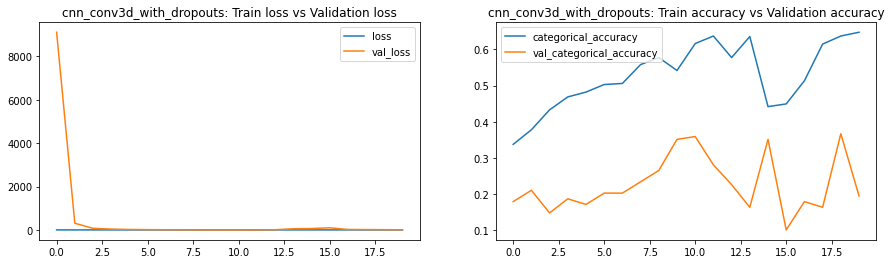

Max. Training Accuracy 0.6473214030265808
Max. Validaiton Accuracy 0.3671875


In [39]:
#Plot CNN Model History with Conv3D and Dropouts
plotModelHistory(cnn_model_with_dropout_history, 'cnn_conv3d_with_dropouts')

# Conv3D with Dropouts using 20 frames (Not Working)

In [40]:
# Model3: CNN conv3D hyper-parameter configuration using 20 frames
batch_size=64
num_epochs = 20
no_of_frames=20 # Number of frames
y=img_height
z=img_width

print ('# batch_size =', batch_size)
print ('# epochs =', num_epochs)
print ('# no_classes =', no_classes)
print ('# input_shape = (%d,%d,%d,%d)'%(no_of_frames, img_height, img_width,3))


# batch_size = 64
# epochs = 20
# no_classes = 5
# input_shape = (20,120,120,3)


In [ ]:
#Write model using Conv3D and MaxPooling3D
conv3d_with_20f_dropout_model = Sequential()
conv3d_with_20f_dropout_model.add(Input((no_of_frames, y, z, 3)))
#conv3d_with_20f_dropout_model.add(Conv3D(16, kernel_size=(3, 3, 3), activation='relu'))
#conv3d_with_20f_dropout_model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#conv3d_with_20f_dropout_model.add(BatchNormalization())
conv3d_with_20f_dropout_model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu'))
conv3d_with_20f_dropout_model.add(MaxPooling3D(pool_size=(2, 2, 2)))
conv3d_with_20f_dropout_model.add(BatchNormalization())
conv3d_with_20f_dropout_model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
conv3d_with_20f_dropout_model.add(MaxPooling3D(pool_size=(3, 3, 3)))
conv3d_with_20f_dropout_model.add(BatchNormalization())
conv3d_with_20f_dropout_model.add(Flatten())
conv3d_with_20f_dropout_model.add(Dense(128, activation='relu'))
conv3d_with_20f_dropout_model.add(BatchNormalization())
conv3d_with_20f_dropout_model.add(Dropout(0.25))
conv3d_with_20f_dropout_model.add(Dense(64, activation='relu'))
conv3d_with_20f_dropout_model.add(BatchNormalization())
conv3d_with_20f_dropout_model.add(Dropout(0.25))
conv3d_with_20f_dropout_model.add(Dense(no_classes, activation='softmax'))

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [ ]:
learning_rate = 0.1
optimiser = tf.keras.optimizers.Adam(learning_rate=learning_rate) #write your optimizer
conv3d_with_20f_dropout_model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (conv3d_with_20f_dropout_model.summary())

In [31]:
model_name_ts = get_model_name('cnn_conv3d_with_dropouts_20frames')
filepath = model_name_ts + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'
#filepath = model_name_ts + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.keras'
checkpoint = ModelCheckpoint(model_checkpoint_path+filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

In [35]:
train_generator = generator(train_path, train_doc, batch_size, no_of_frames)
val_generator = generator(val_path, val_doc, batch_size, no_of_frames)

In [ ]:
#conv3d_model.fit(train_generator, epochs=2, validation_data=val_generator, callbacks=callbacks_list)
#init_model_checkpoint('cnn_conv3d_with_dropouts_20frames')
cnn_model_with_dropout_20f_history = conv3d_with_20f_dropout_model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                    callbacks=callbacks_list, validation_data=val_generator,
                    validation_steps=validation_steps)#, initial_epoch=0)

In [ ]:
#Plot CNN Model History with Conv3D and Dropouts
plotModelHistory(cnn_model_with_dropout_20f_history, 'cnn_conv3d_with_dropouts_20frames')

# Feed conv2D + RNN-LSTM stack

In [23]:
batch_size=32
num_epochs = 20
no_of_frames=30 # Number of frames
y=img_height
z=img_width

print ('# batch_size =', batch_size)
print ('# epochs =', num_epochs)
print ('# no_classes =', no_classes)
print ('# input_shape = (%d,%d,%d,%d)'%(no_of_frames, img_height, img_width,3))


# batch_size = 32
# epochs = 20
# no_classes = 5
# input_shape = (30,120,120,3)


In [24]:
cnn_rnn_model = Sequential()
cnn_rnn_model.add(Input((no_of_frames, y, z, 3)))
cnn_rnn_model.add(TimeDistributed(Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same')))
cnn_rnn_model.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model.add(TimeDistributed(MaxPooling2D(2,2)))

cnn_rnn_model.add(TimeDistributed(Conv2D(32, (3,3), padding='same', activation='relu')))
cnn_rnn_model.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model.add(TimeDistributed(MaxPooling2D(2,2)))

cnn_rnn_model.add(TimeDistributed(Conv2D(64, (3,3), padding='same', activation='relu')))
cnn_rnn_model.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model.add(TimeDistributed(MaxPooling2D(2,2)))

cnn_rnn_model.add(TimeDistributed(Conv2D(128, (3,3), padding='same', activation='relu')))
cnn_rnn_model.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model.add(TimeDistributed(MaxPooling2D(2,2)))

cnn_rnn_model.add(TimeDistributed(Conv2D(256, (3,3), padding='same', activation='relu')))
cnn_rnn_model.add(TimeDistributed(BatchNormalization()))
cnn_rnn_model.add(TimeDistributed(MaxPooling2D(2,2)))

cnn_rnn_model.add(TimeDistributed(Flatten()))
cnn_rnn_model.add(LSTM(256))
#cnn_rnn_model.add(LSTM(units = 20, activation = 'relu', return_sequences = True))
cnn_rnn_model.add(Dropout(0.2))

cnn_rnn_model.add(Dense(256, activation='relu'))
cnn_rnn_model.add(Dropout(0.2))

cnn_rnn_model.add(Dense(5, activation='softmax'))



2024-07-31 13:18:19.823117: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-07-31 13:18:19.823206: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14800 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:3d:00.0, compute capability: 7.5


In [25]:
#optim = tf.keras.optimizers.Adam(lr = 0.1)
optim = tf.keras.optimizers.Adam()
cnn_rnn_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])
print (cnn_rnn_model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 30, 120, 120, 16)  448      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 30, 120, 120, 16)  64       
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 30, 60, 60, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 30, 60, 60, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 30, 60, 60, 32)   1

In [26]:
model_name_ts = get_model_name('cnn_rnn_with_dropouts')
filepath = model_name_ts + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'
#filepath = model_name_ts + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.keras'
checkpoint = ModelCheckpoint(model_checkpoint_path+filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

In [35]:
train_generator = generator(train_path, train_doc, batch_size, no_of_frames)
val_generator = generator(val_path, val_doc, batch_size, no_of_frames)

In [27]:
#init_model_checkpoint('cnn_rnn_with_dropouts')
cnn_rnn_model_history = cnn_rnn_model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                    callbacks=callbacks_list, validation_data=val_generator,
                    validation_steps=validation_steps)#, initial_epoch=0)

Epoch 1/20


2024-07-31 13:19:10.950821: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


21/21 [==============================] - ETA: 0s - loss: 1.3138 - categorical_accuracy: 0.4211
Epoch 00001: saving model to ./modelCheckpoint/cnn_rnn_with_dropoutsmodel_init_2024-07-3113_17_00.182979/model-00001-1.31385-0.42113-1.89326-0.19531.h5
21/21 [==============================] - 180s 9s/step - loss: 1.3138 - categorical_accuracy: 0.4211 - val_loss: 1.8933 - val_categorical_accuracy: 0.1953 - lr: 0.0010
Epoch 2/20
21/21 [==============================] - ETA: 0s - loss: 1.0821 - categorical_accuracy: 0.5670
Epoch 00002: saving model to ./modelCheckpoint/cnn_rnn_with_dropoutsmodel_init_2024-07-3113_17_00.182979/model-00002-1.08214-0.56696-1.99328-0.14062.h5
21/21 [==============================] - 165s 8s/step - loss: 1.0821 - categorical_accuracy: 0.5670 - val_loss: 1.9933 - val_categorical_accuracy: 0.1406 - lr: 0.0010
Epoch 3/20
21/21 [==============================] - ETA: 0s - loss: 0.9241 - categorical_accuracy: 0.5967
Epoch 00003: saving model to ./modelCheckpoint/cnn_rnn_

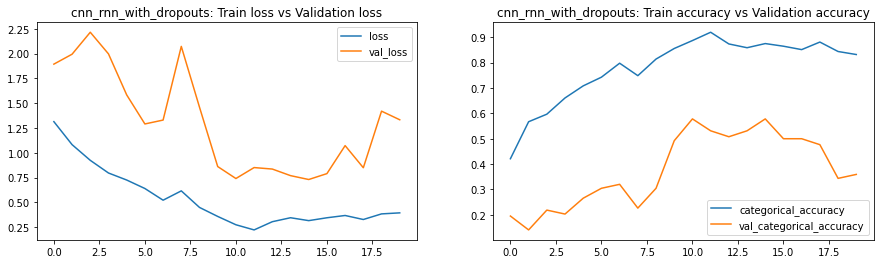

Max. Training Accuracy 0.9196428656578064
Max. Validaiton Accuracy 0.578125


In [28]:
#Plot CNN-RNN Stack Model History with Conv2D + LSTM and Dropouts
plotModelHistory(cnn_rnn_model_history, 'cnn_rnn_with_dropouts')

# Final Model 
# conv2D + RNN-LSTM stack using 20 frames and 64 batch size

In [29]:
batch_size=64
num_epochs = 20
no_of_frames=20 # Number of frames
y=img_height
z=img_width

print ('# batch_size =', batch_size)
print ('# epochs =', num_epochs)
print ('# no_classes =', no_classes)
print ('# input_shape = (%d,%d,%d,%d)'%(no_of_frames, img_height, img_width,3))


# batch_size = 64
# epochs = 20
# no_classes = 5
# input_shape = (20,120,120,3)


In [31]:
cnn_rnn_20f_b64_model = Sequential()
cnn_rnn_20f_b64_model.add(Input((no_of_frames, y, z, 3)))
cnn_rnn_20f_b64_model.add(TimeDistributed(Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same')))
cnn_rnn_20f_b64_model.add(TimeDistributed(BatchNormalization()))
cnn_rnn_20f_b64_model.add(TimeDistributed(MaxPooling2D(2,2)))

cnn_rnn_20f_b64_model.add(TimeDistributed(Conv2D(32, (3,3), padding='same', activation='relu')))
cnn_rnn_20f_b64_model.add(TimeDistributed(BatchNormalization()))
cnn_rnn_20f_b64_model.add(TimeDistributed(MaxPooling2D(2,2)))

cnn_rnn_20f_b64_model.add(TimeDistributed(Conv2D(64, (3,3), padding='same', activation='relu')))
cnn_rnn_20f_b64_model.add(TimeDistributed(BatchNormalization()))
cnn_rnn_20f_b64_model.add(TimeDistributed(MaxPooling2D(2,2)))

cnn_rnn_20f_b64_model.add(TimeDistributed(Conv2D(128, (3,3), padding='same', activation='relu')))
cnn_rnn_20f_b64_model.add(TimeDistributed(BatchNormalization()))
cnn_rnn_20f_b64_model.add(TimeDistributed(MaxPooling2D(2,2)))

cnn_rnn_20f_b64_model.add(TimeDistributed(Conv2D(256, (3,3), padding='same', activation='relu')))
cnn_rnn_20f_b64_model.add(TimeDistributed(BatchNormalization()))
cnn_rnn_20f_b64_model.add(TimeDistributed(MaxPooling2D(2,2)))

cnn_rnn_20f_b64_model.add(TimeDistributed(Flatten()))
cnn_rnn_20f_b64_model.add(LSTM(256))
cnn_rnn_20f_b64_model.add(Dropout(0.2))

cnn_rnn_20f_b64_model.add(Dense(256, activation='relu'))
cnn_rnn_20f_b64_model.add(Dropout(0.2))

cnn_rnn_20f_b64_model.add(Dense(5, activation='softmax'))



In [32]:
optim = tf.keras.optimizers.Adam()
cnn_rnn_20f_b64_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])
print (cnn_rnn_20f_b64_model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_31 (TimeDi  (None, 20, 120, 120, 16)  448      
 stributed)                                                      
                                                                 
 time_distributed_32 (TimeDi  (None, 20, 120, 120, 16)  64       
 stributed)                                                      
                                                                 
 time_distributed_33 (TimeDi  (None, 20, 60, 60, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_34 (TimeDi  (None, 20, 60, 60, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_35 (TimeDi  (None, 20, 60, 60, 32)  

In [33]:
model_name_ts = get_model_name('cnn_rnn_20f_b64_model')
filepath = model_name_ts + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'
#filepath = model_name_ts + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.keras'
checkpoint = ModelCheckpoint(model_checkpoint_path+filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

In [35]:
train_generator = generator(train_path, train_doc, batch_size, no_of_frames)
val_generator = generator(val_path, val_doc, batch_size, no_of_frames)

In [36]:
#init_model_checkpoint('cnn_rnn_20f_b64_model')
cnn_rnn_20f_b64_model_history = cnn_rnn_20f_b64_model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                    callbacks=callbacks_list, validation_data=val_generator,
                    validation_steps=validation_steps)#, initial_epoch=0)

Epoch 1/20
21/21 [==============================] - ETA: 0s - loss: 1.2609 - categorical_accuracy: 0.4182
Epoch 00001: saving model to ./modelCheckpoint/cnn_rnn_20f_b64_modelmodel_init_2024-07-3113_17_00.182979/model-00001-1.26090-0.41815-1.87136-0.19531.h5
21/21 [==============================] - 208s 10s/step - loss: 1.2609 - categorical_accuracy: 0.4182 - val_loss: 1.8714 - val_categorical_accuracy: 0.1953 - lr: 0.0010
Epoch 2/20
21/21 [==============================] - ETA: 0s - loss: 0.8681 - categorical_accuracy: 0.6116
Epoch 00002: saving model to ./modelCheckpoint/cnn_rnn_20f_b64_modelmodel_init_2024-07-3113_17_00.182979/model-00002-0.86810-0.61161-1.77046-0.20312.h5
21/21 [==============================] - 204s 10s/step - loss: 0.8681 - categorical_accuracy: 0.6116 - val_loss: 1.7705 - val_categorical_accuracy: 0.2031 - lr: 0.0010
Epoch 3/20
21/21 [==============================] - ETA: 0s - loss: 0.6298 - categorical_accuracy: 0.6994
Epoch 00003: saving model to ./modelCheckp

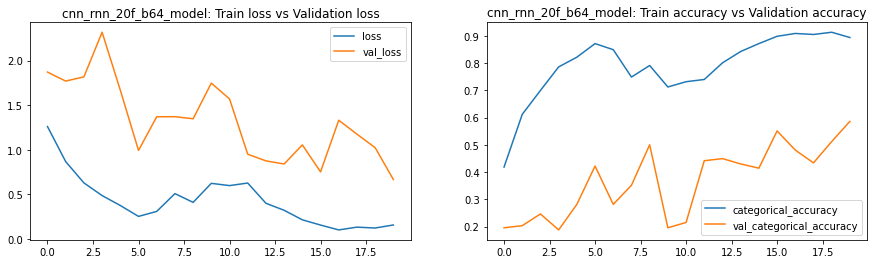

Max. Training Accuracy 0.9129464030265808
Max. Validaiton Accuracy 0.5859375


In [38]:
#Plot CNN-RNN Stack Model History with Conv2D + LSTM and Dropouts
plotModelHistory(cnn_rnn_20f_b64_model_history, 'cnn_rnn_20f_b64_model')

Model selected CNN-RNN using Conv2D + LSTM with dropouts is showing results better then other models.
Both the CNN-RNN models are showing the same result
# Final Accuracy achieved is 58% 

Validation Accuracy of 58% is not good and still has scope for improvement
# TODO items to experiment:
* using different image normalization techniques
* using different types of filters and layers to increase Valdiation Accuracy.
* using transfer learning technique from 2D Convs of CNN
* Experiment CNN with GRU

# END of Project